# NER with spaCy & roBERTa
#### Euronews

In [1]:
# Import libraries
import spacy
from spacy import displacy
import pandas as pd
from collections import Counter 
import matplotlib.pyplot as plt

# Settings
%matplotlib inline

In [2]:
# Download the model
# Documentation: https://spacy.io/models/en#en_core_web_trf
trf = spacy.load('en_core_web_trf')

In [3]:
# Convert data into a DataFrame
df = pd.read_csv("../data/Euronews.csv")

In [ ]:
# Check the DataFrame
df.head(5)

In [5]:
# Visualize the entity recognizer for one article
#one_text = df['text'].iloc[0]
#doc = trf(one_text)
#displacy.render(doc, style='ent')

In [5]:
# Create the function to return a list of mentioned organizations
def get_entities(text):
    # process the text with a SpaCy model to get named entities
    doc = trf(text)
    # initialize list to store identified organizations
    org_list = []
    people_list = []
    norp_list = []
    gpe_list = []
    location_list = []
    event_list = []
    date_list = []
    time_list = []
    # loop through the identified entities and append entities to lists
    for entity in doc.ents:
        if entity.label_ == 'ORG':
            org_list.append(entity.text)
        elif entity.label_ == 'PERSON':
            people_list.append(entity.text)
        #elif entity.label_ == 'NORP':
           # norp_list.append(entity.text)
        #elif entity.label_ == 'GPE':
            #gpe_list.append(entity.text)
        #elif entity.label_ == 'LOC':
            #location_list.append(entity.text)
        #elif entity.label_ == 'EVENT':
            #event_list.append(entity.text)
        #elif entity.label_ == 'DATE':
            #date_list.append(entity.text)
        #elif entity.label_ == 'TIME':
            #time_list.append(entity.text)
    
    return org_list, people_list#, norp_list, gpe_list, location_list, event_list, date_list, time_list

In [ ]:
# Fetch the entities and put them in separate columns
#df[['Org', 'People', 'NORP', 'GPE', 'Location', 'Event', 'Date', 'Time']] = df['text'].apply(lambda x: pd.Series(get_entities(x)))
df[['Org', 'People']] = df['text'].apply(lambda x: pd.Series(get_entities(x)))
df.head(2)

In [7]:
# Check a single document for an entity
df['People'].loc[1]

['David Kirichenko',
 'Vadym Gutsait',
 'Volodymyr Zelenskyy',
 'Alex Texeira',
 'Willian',
 'Rinat Akhmetov',
 'David Kirichenko']

In [8]:
# Convert each entity column into lists / merge organizations column into one big list
org_list = df['Org'].to_list()
people_list = df['People'].to_list()
#norp_list = df['NORP'].to_list()
#gpe_list = df['GPE'].to_list()
#location_list = df['Location'].to_list()
#event_list = df['Event'].to_list()
#date_list = df['Date'].to_list()
#time_list = df['Time'].to_list()

# Flatten the lists (combine all rows into one list per entity type)
org_list = [org for sublist in org_list for org in sublist]
people_list = [person for sublist in people_list for person in sublist]
#norp_list = [norp for sublist in norp_list for norp in sublist]
#gpe_list = [gpe for sublist in gpe_list for gpe in sublist]
#location_list = [location for sublist in location_list for location in sublist]
#event_list = [event for sublist in event_list for event in sublist]
#date_list = [date for sublist in date_list for date in sublist]
#time_list = [time for sublist in time_list for time in sublist]

In [9]:
# Create dictionary of entity mention frequency and calculate frequencies of selected entities
org_freq = Counter(org_list)
org_freq.most_common(30)

[('EU', 710),
 ('NATO', 490),
 ('Euronews', 163),
 ('Kremlin', 135),
 ('Reuters', 121),
 ('UN', 104),
 ('the European Union', 101),
 ('Telegram', 73),
 ('Frontex', 66),
 ('European Union', 49),
 ('Commission', 42),
 ('Gazprom', 39),
 ('U.N.', 34),
 ('the European Commission', 29),
 ('State', 25),
 ('ECB', 23),
 ('Kyiv', 22),
 ('the United Nations', 22),
 ('Energoatom', 22),
 ('Foundation', 22),
 ('RT', 22),
 ('G7', 20),
 ('IAEA', 19),
 ('Twitter', 18),
 ('ICC', 18),
 ('the European Parliament', 18),
 ('Pentagon', 18),
 ('Naftogaz', 18),
 ('The European Union', 17),
 ('AFP', 17)]

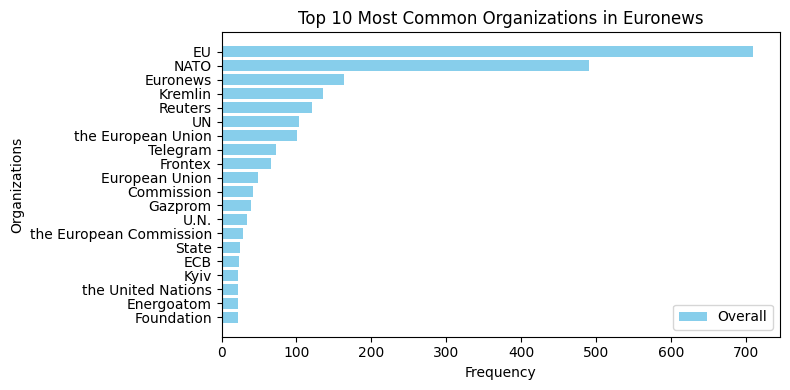

In [11]:
# Visualize frequencies of organisation entity in two media outleats
common_orgs = org_freq.most_common(20)
org_names, org_counts = zip(*common_orgs)
plt.figure(figsize=(8, 4))
plt.barh(org_names, org_counts, color='skyblue', label='Overall')
plt.xlabel('Frequency')
plt.ylabel('Organizations')
plt.title('Top 10 Most Common Organizations in Euronews')
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Create dictionary of entity mention frequency and calculate frequencies of selected entities
people_freq = Counter(people_list)
people_freq.most_common(30)

[('Putin', 341),
 ('Zelenskyy', 181),
 ('Vladimir Putin', 159),
 ('Biden', 88),
 ('Volodymyr Zelenskyy', 86),
 ('Macron', 83),
 ('Zelenskiy', 71),
 ('Johnson', 68),
 ('Scholz', 66),
 ('Truss', 56),
 ('Joe Biden', 52),
 ('Olaf Scholz', 45),
 ('Volodymyr Zelenskiy', 43),
 ('Lavrov', 42),
 ('Blinken', 42),
 ('Emmanuel Macron', 41),
 ('Boris Johnson', 37),
 ('Meloni', 36),
 ('Sergei Lavrov', 27),
 ('Borrell', 27),
 ('Liz Truss', 27),
 ('Jens Stoltenberg', 24),
 ('Josep Borrell', 24),
 ('Stoltenberg', 23),
 ('Orban', 23),
 ('Erdogan', 23),
 ('Reznikov', 23),
 ('Antony Blinken', 22),
 ('Robin', 22),
 ('Dmitry Peskov', 21)]

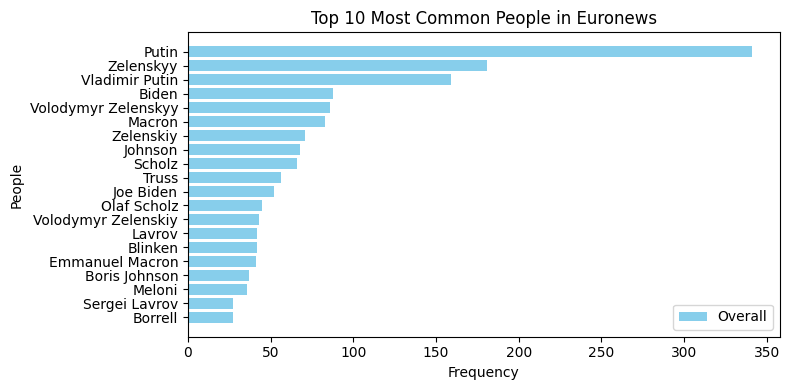

In [13]:
# Visualize frequencies of organisation entity in two media outleats
common_people = people_freq.most_common(20)
people_names, people_counts = zip(*common_people)
plt.figure(figsize=(8, 4))
plt.barh(people_names, people_counts, color='skyblue', label='Overall')
plt.xlabel('Frequency')
plt.ylabel('People')
plt.title('Top 10 Most Common People in Euronews')
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()

# NER with Sentiment

##### with a pre-built distilBERT model from the Flair library

In [14]:
#Import the libraries
import flair
import ast

#Initialize the model
model = flair.models.TextClassifier.load('en-sentiment')

In [15]:
# Create the function
def get_sentiment(text):
    # treat the entire text as one sentence / tokenization
    sentence = flair.data.Sentence(text)
    # make sentiment prediction
    model.predict(sentence)
    # extract sentiment direction and confidence (label and score) object
    sentiment = sentence.labels[0]
    return sentiment

In [16]:
# Get sentiment
df['sentiment_byTransformer'] = df['text'].apply(get_sentiment)
df.head(2)

,title,date_str,siteName,text,sentiment,pageUrl,author,Org,People,sentiment_byTransformer
0,Czech teacher acquitted after telling students...,d2023-06-23T12:34:22,euronews,The defence claims Martina Bednarova is a vict...,-0.83,https://www.euronews.com/2023/06/23/czech-teac...,Jiri Skacel & Rory Elliott Armstrong,[],"[Martina Bednarova, Martina Bednarova, Richard...","Sentence[380]: ""The defence claims Martina Bed..."
1,Shakhtar Donetsk's wartime title shows Ukraini...,d2023-06-22T14:18:18,euronews,The opinions expressed in this article are tho...,0.00,https://www.euronews.com/2023/06/22/shakhtar-d...,David Kirichenko,"[Euronews, Shakhtar Donetsk, Shakhtar Donetsk,...","[David Kirichenko, Vadym Gutsait, Volodymyr Ze...","Sentence[1435]: ""The opinions expressed in thi..."


In [ ]:
# Check a single document for a sentiment
df['sentiment_byTransformer'][1]

In [18]:
# Convert each value in the entity column to a list
df['Org'] = df['Org'].astype(str)
#df['people'] = df['people'].astype(str)
#df['norp'] = df['norp'].astype(str)
#df['gpe'] = df['gpe'].astype(str)
#df['location'] = df['location'].astype(str)
#df['event'] = df['event'].astype(str)

df['Org'] = df['Org'].apply(lambda x: ast.literal_eval(x))
#df['people'] = df['people'].apply(lambda x: ast.literal_eval(x))
#df['norp'] = df['norp'].apply(lambda x: ast.literal_eval(x))
#df['gpe'] = df['gpe'].apply(lambda x: ast.literal_eval(x))
#df['location'] = df['location'].apply(lambda x: ast.literal_eval(x))
#df['event'] = df['event'].apply(lambda x: ast.literal_eval(x))

In [19]:
# Initialize sentiment dictionary
sentiment = {}

for i, row in df.iterrows(): # loop through dataframe and extract org labels and sentiment scores into sentiment dictionary
    direction = row['sentiment_byTransformer'].value # extract sentiment direction and score
    score = row['sentiment_byTransformer'].score
    for org in row['Org']: # loop through each label in organizations column
        if org not in sentiment.keys(): # check if org label exists in sentiment dictionary already
            sentiment[org] = {'POSITIVE': [], 'NEGATIVE': []} # if it doesn't, initialize new entry in dictionary
        sentiment[org][direction].append(score) # append positive/negative score to respective dictionary entry

In [20]:
# Check a single org entity
sentiment['NATO']

{'POSITIVE': [0.946878969669342,
  0.9587015509605408,
  0.9043471217155457,
  0.5872987508773804,
  0.5872987508773804,
  0.5872987508773804,
  0.5872987508773804,
  0.5872987508773804,
  0.5872987508773804,
  0.5872987508773804,
  0.5872987508773804,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.9621527791023254,
  0.7923719882965088,
  0.7923719882965088,
  0.7923719882965088,
  0.7923719882965088,
  0.7923719882965088,
  0.7059302926063538,
  0.7059302926063538,
  0.7059302926063538,
  0.7059302926063538,
  0.7059302926063538,
  0.7059302926063538,
  0.7059302926063538,
  0.7059302926063538,
  0.6762922406196594,
  0.6762922406196594,
  0.6762922406196594,
  0.6762922406196594,
  0.6762922406196594,
  0.6762922406196594,

In [21]:
# Loop through each organization entry in the sentiment dictionary and calculate an average positive, and average negative score

# initialize sentiment list
avg_sentiment = []
for org in sentiment.keys(): # loop through each organization
    freq = len(sentiment[org]['POSITIVE']) + len(sentiment[org]['NEGATIVE']) # get number of positive and negative ratings
    
     # initialize total positive and total negative scores
    total_positive = 0.0
    total_negative = 0.0
    
    for direction in ['POSITIVE', 'NEGATIVE']:
        score = sentiment[org][direction] # assign to variable for cleaner code
        if len(score) == 0: # if there are no entries, set to 0
            sentiment[org][direction] = 0.0
        else:
            if direction == 'POSITIVE':
                total_positive = sum(score)  # sum positive scores
            else:
                total_negative = sum(score)  # sum negative scores
    avg_positive = total_positive / freq if freq != 0 else 0.0
    avg_negative = total_negative / freq if freq != 0 else 0.0

    avg_sentiment.append({
        'entity': org,
        'positive': avg_positive,
        'negative': avg_negative,
        'frequency': freq,
        'score': avg_positive - avg_negative 
    })

In [22]:
# Check sentiment for a single entity
sentiment_df = pd.DataFrame(avg_sentiment)
sentiment_df[sentiment_df['entity'] == 'NATO'].head()

,entity,positive,negative,frequency,score
17,NATO,0.117501,0.797594,490,-0.680093


In [23]:
# Filter out anything with less than or equal to a frequency of 50
sentiment_df = sentiment_df[sentiment_df['frequency'] > 22]
sentiment_df

,entity,positive,negative,frequency,score
0,Euronews,0.145340,0.770103,163,-0.624763
17,NATO,0.117501,0.797594,490,-0.680093
19,EU,0.081102,0.847541,710,-0.766439
25,Kremlin,0.029731,0.936539,135,-0.906808
40,UN,0.059290,0.905570,104,-0.846280
41,the European Union,0.097255,0.830106,101,-0.732851
45,Reuters,0.107841,0.848346,121,-0.740505
53,Telegram,0.029840,0.935794,73,-0.905954
66,Commission,0.062970,0.897644,42,-0.834674
76,U.N.,0.043431,0.869786,34,-0.826354


In [24]:
# Map different versions of the same entity
org_map = {
    'EU': "the European Union",
    'Kyiv Post': 'the Kyiv Post',
    'AFU': 'the Armed Forces of Ukraine'
}
sentiment_df['entity'] = sentiment_df['entity'].replace(org_map)
sentiment_df

,entity,positive,negative,frequency,score
0,Euronews,0.145340,0.770103,163,-0.624763
17,NATO,0.117501,0.797594,490,-0.680093
19,the European Union,0.081102,0.847541,710,-0.766439
25,Kremlin,0.029731,0.936539,135,-0.906808
40,UN,0.059290,0.905570,104,-0.846280
41,the European Union,0.097255,0.830106,101,-0.732851
45,Reuters,0.107841,0.848346,121,-0.740505
53,Telegram,0.029840,0.935794,73,-0.905954
66,Commission,0.062970,0.897644,42,-0.834674
76,U.N.,0.043431,0.869786,34,-0.826354


In [25]:
# Search for the entities with the highest overall score
sentiment_df.sort_values('score', ascending=False).head(11)                                        

,entity,positive,negative,frequency,score
0,Euronews,0.145340,0.770103,163,-0.624763
17,NATO,0.117501,0.797594,490,-0.680093
41,the European Union,0.097255,0.830106,101,-0.732851
45,Reuters,0.107841,0.848346,121,-0.740505
258,State,0.081802,0.837590,25,-0.755788
19,the European Union,0.081102,0.847541,710,-0.766439
357,ECB,0.090796,0.866970,23,-0.776174
141,the European Commission,0.055209,0.859128,29,-0.803919
172,European Union,0.046430,0.859886,49,-0.813455
76,U.N.,0.043431,0.869786,34,-0.826354


In [26]:
# Search for the entities with the lowest overall score
sentiment_df.sort_values('score', ascending=True).head(20)  

,entity,positive,negative,frequency,score
174,Frontex,0.000000,0.993986,66,-0.993986
149,Gazprom,0.024671,0.953745,39,-0.929074
25,Kremlin,0.029731,0.936539,135,-0.906808
53,Telegram,0.029840,0.935794,73,-0.905954
40,UN,0.059290,0.905570,104,-0.846280
66,Commission,0.062970,0.897644,42,-0.834674
76,U.N.,0.043431,0.869786,34,-0.826354
172,European Union,0.046430,0.859886,49,-0.813455
141,the European Commission,0.055209,0.859128,29,-0.803919
357,ECB,0.090796,0.866970,23,-0.776174


<Figure size 1000x800 with 0 Axes>

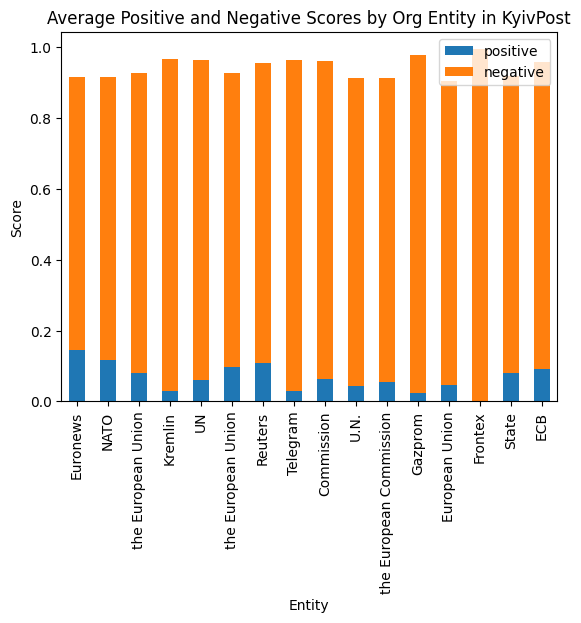

In [27]:
# Plot scores with entity names on the x-axis
plt.figure(figsize=(10,8))
sentiment_df[['entity', 'positive', 'negative']].plot(x='entity', kind='bar', stacked=True)
plt.title('Average Positive and Negative Scores by Org Entity in KyivPost')
plt.xlabel('Entity')
plt.ylabel('Score')
plt.show()